<a href="https://colab.research.google.com/github/drfperez/psychometrics/blob/main/CCBBGraf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"

Warning message in psych::alpha(dades, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



╔══════════ ANÀLISI PSICOMÈTRIC ══════════╗
  Item Dificultat Discriminacio Punt_Biserial
    Q1       0.71        -0.054         0.083
    Q2       0.74        -0.004         0.129
    Q3       0.71         0.109         0.243
    Q4       0.69        -0.091         0.049
  Q5_1       0.72         0.051         0.185
  Q5_2       0.67        -0.069         0.073
  Q5_3       0.65        -0.016         0.128
  Q5_4       0.73        -0.007         0.127
    Q6       0.72        -0.064         0.071
    Q7       0.71         0.116         0.250
    Q8       0.73         0.062         0.195
  Q9_1       0.71        -0.060         0.077
  Q9_2       0.67        -0.088         0.054
  Q9_3       0.79         0.273         0.385
  Q9_4       0.57         0.071         0.218
   Q10       0.76         0.025         0.154
   Q11       0.67         0.080         0.220
   Q12       0.65         0.107         0.248
 Q13_1       0.69        -0.039         0.101
 Q13_2       0.79         0.202    

Warning message in psych::alpha(dades_bona, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Nova Alfa de Cronbach sense ítems problemàtics: 0.199 


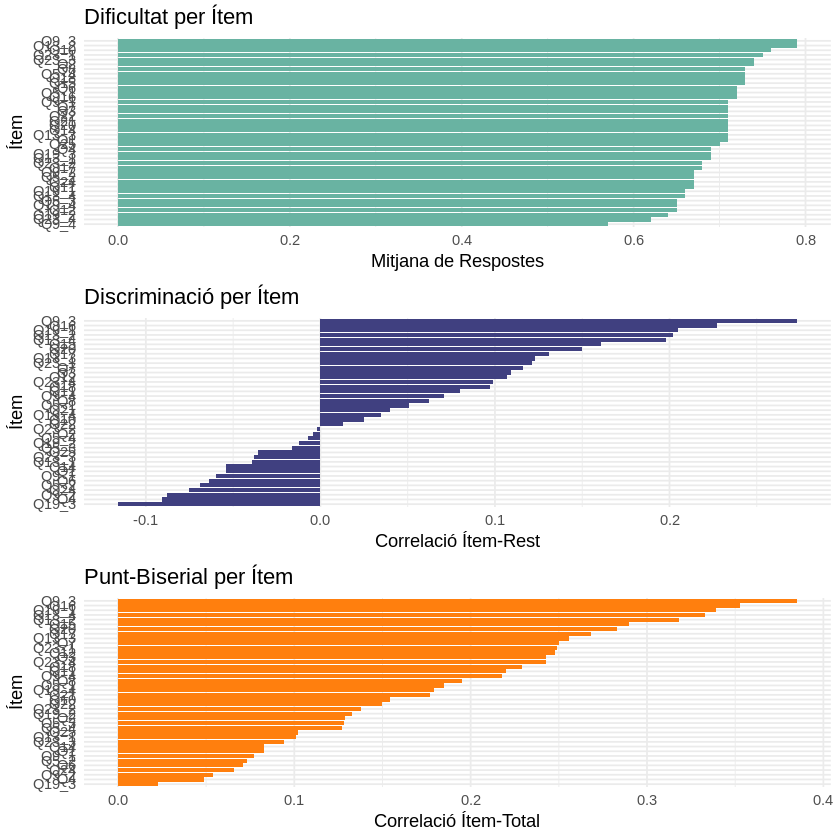

In [10]:

# ─── 0) Instal·lació i càrrega de paquets ───────────────────────────────────────
paquets <- c("psych", "readr", "ggplot2", "gridExtra", "reshape2")
nous    <- paquets[! paquets %in% installed.packages()[, "Package"]]
if (length(nous)) install.packages(nous, repos = "https://cloud.r-project.org")
lapply(paquets, library, character.only = TRUE)

# ─── 1) Lectura de fitxer CSV ───────────────────────────────────────────────────
# Si és a Colab, ruta serà /content/
arxiu_csv <- "/content/dades (13).csv" # <-- Si tens un altre nom, canvia'l!

if (!file.exists(arxiu_csv)) {
  cat("Fitxer no trobat automàticament.\nSelecciona manualment...\n")
  arxiu_csv <- file.choose()
}

dades_raw <- readr::read_csv(arxiu_csv, show_col_types = FALSE)

# ─── 2) Preparació de la matriu d'ítems ─────────────────────────────────────────
dades <- dades_raw[ , sapply(dades_raw, is.numeric), drop = FALSE]
dades[is.na(dades)] <- 0
dades[] <- lapply(dades, as.integer)

# ─── 3) Anàlisi psicomètric ────────────────────────────────────────────────────
# Dificultat
dificultat    <- colMeans(dades)
# Puntuació total
total_score   <- rowSums(dades)

# Discriminació
discriminacio <- sapply(names(dades), function(item) {
  xi <- dades[[item]]
  rest <- total_score - xi
  if (var(rest) == 0) return(NA_real_)
  cor(xi, rest)
})

# Punt-biserial
punt_biserial <- sapply(names(dades), function(item) {
  xi <- dades[[item]]
  if (var(xi) == 0) return(NA_real_)
  cor(xi, total_score)
})

# ─── 4) Alfa de Cronbach ────────────────────────────────────────────────────────
alpha_out <- psych::alpha(dades, check.keys = TRUE)
alfa      <- alpha_out$total$raw_alpha

# ─── 5) Taula de resultats ──────────────────────────────────────────────────────
resultats <- data.frame(
  Item          = names(dades),
  Dificultat    = round(dificultat, 3),
  Discriminacio = round(discriminacio, 3),
  Punt_Biserial = round(punt_biserial, 3),
  stringsAsFactors = FALSE
)

cat("\n╔══════════ ANÀLISI PSICOMÈTRIC ══════════╗\n")
print(resultats, row.names = FALSE)
cat("╚═══════════════════════════════════════╝\n\n")
cat("Alfa de Cronbach:", round(alfa, 3), "\n\n")

# ─── 6) Ítems problemàtics ─────────────────────────────────────────────────────
problematics <- resultats$Item[
  (resultats$Discriminacio < 0.20) |
  (resultats$Punt_Biserial < 0.20)
]

if (length(problematics) > 0) {
  cat("Ítems problemàtics detectats:\n")
  cat(" •", problematics, sep = "\n")
} else {
  cat("No hi ha ítems problemàtics.\n")
}

# ─── 7) Gràfics ────────────────────────────────────────────────────────────────
# Barres: Dificultat
plot_dificultat <- ggplot(resultats, aes(x=reorder(Item, Dificultat), y=Dificultat)) +
  geom_bar(stat="identity", fill="#69b3a2") +
  coord_flip() +
  labs(title="Dificultat per Ítem", x="Ítem", y="Mitjana de Respostes") +
  theme_minimal()

# Barres: Discriminació
plot_discriminacio <- ggplot(resultats, aes(x=reorder(Item, Discriminacio), y=Discriminacio)) +
  geom_bar(stat="identity", fill="#404080") +
  coord_flip() +
  labs(title="Discriminació per Ítem", x="Ítem", y="Correlació Ítem-Rest") +
  theme_minimal()

# Barres: Punt-biserial
plot_puntbiserial <- ggplot(resultats, aes(x=reorder(Item, Punt_Biserial), y=Punt_Biserial)) +
  geom_bar(stat="identity", fill="#ff7f0e") +
  coord_flip() +
  labs(title="Punt-Biserial per Ítem", x="Ítem", y="Correlació Ítem-Total") +
  theme_minimal()

# Mostrar tots junts
gridExtra::grid.arrange(plot_dificultat, plot_discriminacio, plot_puntbiserial, ncol=1)

# ─── 8) Opcional: Eliminar ítems problemàtics i recalcular ──────────────────────
# Si vols eliminar-los i recalcular:
dades_bona <- dades[ , !names(dades) %in% problematics]

if (ncol(dades_bona) > 1) {
  alpha_out_bona <- psych::alpha(dades_bona, check.keys = TRUE)
  cat("\nNova Alfa de Cronbach sense ítems problemàtics:", round(alpha_out_bona$total$raw_alpha, 3), "\n")
} else {
  cat("\nMassa pocs ítems per recalcular Alfa.\n")
}

[[1]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "gridExtra" "reshape2"  "ggplot2"   "readr"     "psych"     "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"

Warning message in psych::alpha(dades, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Alfa inicial de Cronbach: 0.518 

Vols eliminar ítems amb baixa discriminació?
Introdueix mínim de Discriminació acceptable (ex: 0.20): 0.20

Vols filtrar per dificultat?
Introdueix Dificultat mínima acceptable (ex: 0.3): 0.24
Introdueix Dificultat màxima acceptable (ex: 0.8): 0.84

Ítems seleccionats:
Q9_3
Q13_2
Q16
Q19_1


Warning message in psych::alpha(dades_bona, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”



Nova Alfa de Cronbach: 0.199 


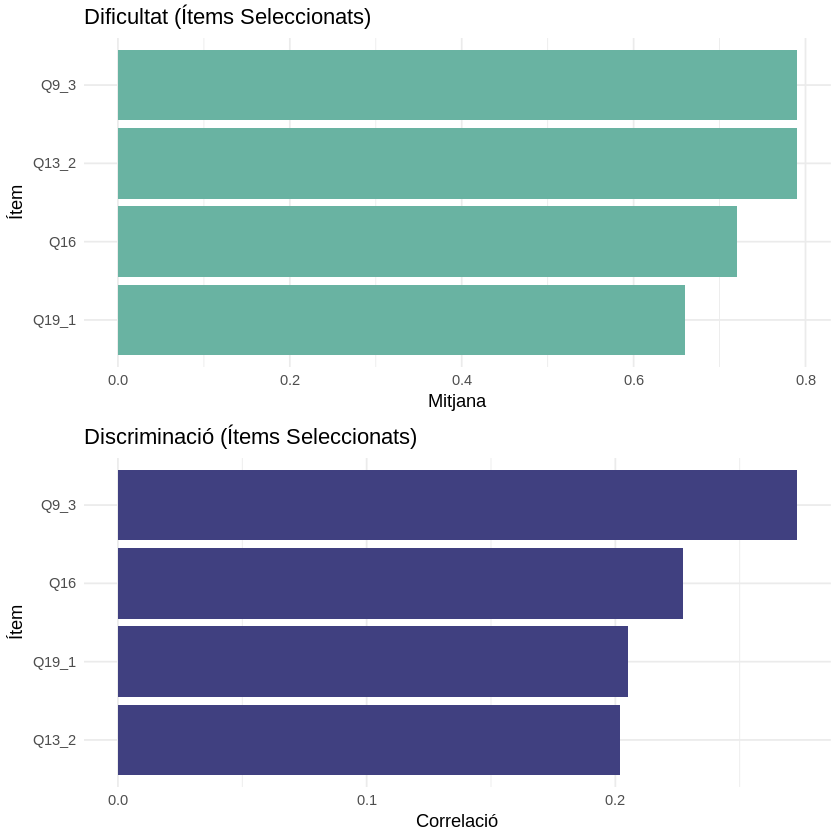

In [11]:

# ─── 0) Instal·lació i càrrega de paquets ───────────────────────────────────────
paquets <- c("psych", "readr", "ggplot2", "gridExtra", "reshape2")
nous    <- paquets[! paquets %in% installed.packages()[, "Package"]]
if (length(nous)) install.packages(nous, repos = "https://cloud.r-project.org")
lapply(paquets, library, character.only = TRUE)

# ─── 1) Lectura de fitxer CSV ───────────────────────────────────────────────────
arxiu_csv <- "/content/dades (13).csv" # <-- Canvia si cal!

if (!file.exists(arxiu_csv)) {
  cat("Fitxer no trobat automàticament.\nSelecciona manualment...\n")
  arxiu_csv <- file.choose()
}

dades_raw <- readr::read_csv(arxiu_csv, show_col_types = FALSE)

# ─── 2) Preparació ──────────────────────────────────────────────────────────────
dades <- dades_raw[ , sapply(dades_raw, is.numeric), drop = FALSE]
dades[is.na(dades)] <- 0
dades[] <- lapply(dades, as.integer)

# ─── 3) Anàlisi inicial ─────────────────────────────────────────────────────────
dificultat    <- colMeans(dades)
total_score   <- rowSums(dades)

discriminacio <- sapply(names(dades), function(item) {
  xi <- dades[[item]]
  rest <- total_score - xi
  if (var(rest) == 0) return(NA_real_)
  cor(xi, rest)
})

punt_biserial <- sapply(names(dades), function(item) {
  xi <- dades[[item]]
  if (var(xi) == 0) return(NA_real_)
  cor(xi, total_score)
})

resultats <- data.frame(
  Item          = names(dades),
  Dificultat    = round(dificultat, 3),
  Discriminacio = round(discriminacio, 3),
  Punt_Biserial = round(punt_biserial, 3),
  stringsAsFactors = FALSE
)

alpha_inicial <- psych::alpha(dades, check.keys = TRUE)
cat("\nAlfa inicial de Cronbach:", round(alpha_inicial$total$raw_alpha, 3), "\n")

# ─── 4) Interacció amb l'usuari ─────────────────────────────────────────────────
cat("\nVols eliminar ítems amb baixa discriminació?\n")
disc_cutoff <- as.numeric(readline(prompt="Introdueix mínim de Discriminació acceptable (ex: 0.20): "))

cat("\nVols filtrar per dificultat?\n")
diff_min <- as.numeric(readline(prompt="Introdueix Dificultat mínima acceptable (ex: 0.3): "))
diff_max <- as.numeric(readline(prompt="Introdueix Dificultat màxima acceptable (ex: 0.8): "))

# ─── 5) Selecció d'ítems bons ───────────────────────────────────────────────────
items_bons <- resultats$Item[
  (resultats$Discriminacio >= disc_cutoff) &
  (resultats$Dificultat >= diff_min) &
  (resultats$Dificultat <= diff_max)
]

cat("\nÍtems seleccionats:\n")
cat(items_bons, sep = "\n")

# ─── 6) Reanàlisi només amb ítems bons ──────────────────────────────────────────
dades_bona <- dades[ , names(dades) %in% items_bons]

if (ncol(dades_bona) > 1) {
  alpha_final <- psych::alpha(dades_bona, check.keys = TRUE)
  cat("\nNova Alfa de Cronbach:", round(alpha_final$total$raw_alpha, 3), "\n")
} else {
  cat("\nMassa pocs ítems per calcular una nova Alfa.\n")
}

# ─── 7) Gràfics actualitzats ────────────────────────────────────────────────────
resultats_bons <- resultats[resultats$Item %in% items_bons, ]

plot_dificultat <- ggplot(resultats_bons, aes(x=reorder(Item, Dificultat), y=Dificultat)) +
  geom_bar(stat="identity", fill="#69b3a2") +
  coord_flip() +
  labs(title="Dificultat (Ítems Seleccionats)", x="Ítem", y="Mitjana") +
  theme_minimal()

plot_discriminacio <- ggplot(resultats_bons, aes(x=reorder(Item, Discriminacio), y=Discriminacio)) +
  geom_bar(stat="identity", fill="#404080") +
  coord_flip() +
  labs(title="Discriminació (Ítems Seleccionats)", x="Ítem", y="Correlació") +
  theme_minimal()

gridExtra::grid.arrange(plot_dificultat, plot_discriminacio, ncol=1)

In [15]:

# INSTAL·LACIÓ I LLIBRERIES
if (!require(psych)) install.packages("psych", repos = "http://cran.us.r-project.org")
if (!require(ggplot2)) install.packages("ggplot2", repos = "http://cran.us.r-project.org")
if (!require(grid)) install.packages("grid", repos = "http://cran.us.r-project.org")

library(psych)
library(ggplot2)
library(grid)

# LLEGIM DADES
dades_path <- "/content/dades (13).csv"
data <- read.csv(dades_path, header = TRUE, stringsAsFactors = FALSE)
data <- data.frame(lapply(data, function(x) as.numeric(as.character(x)))) # Assegurem que són números

# CÀLCULS PSICOMÈTRICS
alpha_res <- psych::alpha(data, check.keys = TRUE)
alpha_val <- alpha_res$total$raw_alpha
item_stats <- alpha_res$item.stats

df <- data.frame(
  Item = factor(rownames(item_stats), levels = rownames(item_stats)),
  Dificultat = item_stats$mean,
  Discriminacio = item_stats$r.drop,
  PuntBiserial = item_stats$raw.r
)

# GRÀFICS
plot_diff <- ggplot(df, aes(x = Dificultat, y = Item)) +
  geom_col(fill = "#4c78a8") +
  theme_minimal(base_size = 16) +
  labs(title = "Dificultat per Ítem", x = "Mitjana de Respostes", y = "Ítem")

plot_discr <- ggplot(df, aes(x = Discriminacio, y = Item)) +
  geom_col(fill = "#f58518") +
  theme_minimal(base_size = 16) +
  labs(title = "Discriminació per Ítem", x = "Correlació Ítem-Rest", y = "Ítem")

plot_pb <- ggplot(df, aes(x = PuntBiserial, y = Item)) +
  geom_col(fill = "#54a24b") +
  theme_minimal(base_size = 16) +
  labs(title = "Punt-Biserial per Ítem", x = "Correlació Ítem-Total", y = "Ítem")

# GENERACIÓ DEL PDF
pdf("/content/Informe_Psicometric.pdf", width = 8.5, height = 11)

print(plot_diff)
print(plot_discr)
print(plot_pb)

# Resum textual final
if (alpha_val >= 0.9) {
  comentari <- "Excel·lent consistència interna."
} else if (alpha_val >= 0.8) {
  comentari <- "Molt bona consistència interna."
} else if (alpha_val >= 0.7) {
  comentari <- "Raonable consistència interna."
} else {
  comentari <- "Consistència interna baixa (cal revisar ítems)."
}

resum <- paste0(
  "Nombre d'ítems: ", ncol(data), "\n",
  "Alfa de Cronbach: ", round(alpha_val,3), "\n",
  "Comentari: ", comentari
)

grid.newpage()
grid.text(resum, x = 0.1, y = 0.8, just = "left", gp = gpar(fontsize = 16))

dev.off()

cat("Informe creat: /content/Informe_Psicometric.pdf")

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in psych::alpha(data, check.keys = TRUE):
“Item = Estudiant had no variance and was deleted but still is counted in the score”
Warning message in psych::alpha(data, check.keys = TRUE):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”


pdf 
  2

Informe creat: /content/Informe_Psicometric.pdf